In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
import os
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image
import numpy as np 
import random

In [3]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
print("Num of gpu:", len(tf.config.experimental.list_physical_devices('GPU')))

Num of gpu: 1


In [5]:
testing_data_dir = '../data//bangladeshi_banknote/Testing'
classes = ['1', '2', '5', '10', '20', '50', '100','500','1000']

In [6]:
test_generator = ImageDataGenerator().flow_from_directory(testing_data_dir
                                                          , target_size=(224, 224)
                                                          , batch_size=5
                                                          , classes= classes
                                                          , shuffle= False
                                                          , seed=0)

Found 333 images belonging to 9 classes.


In [7]:
# Load pre-trained model
model_own = load_model('../models/own_model_keras.h5')
model_resnet50 = load_model("../models/resnet50_keras.h5")
model_vgg = load_model("../models/vgg16_keras.h5")

In [8]:
# Print model structure
print("=================================== Own_model ============================================")
print("Own_model:\n", model_own.summary())
print("=================================== ResNet50 =========================================")
print("ResNet5O:\n", model_resnet50.summary())
print("=================================== VGG16 ============================================")
print("VGG16:\n", model_vgg.summary())


=================================== Own_model ============================================
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                    

In [9]:
# Predict the data using own model and print out accuracy
score = model_own.evaluate(test_generator)
print("Accuracy using Own model: ", score) 

67/67 [==============================] - 15s 29ms/step - loss: 0.5582 - accuracy: 0.8919
Accuracy using Own model:  [0.5581830739974976, 0.8918918967247009]


In [10]:
# Predict the data using ResNet50 model and print out accuracy
score = model_resnet50.evaluate(test_generator)
print("Accuracy using ResNet50: ", score) 

67/67 [==============================] - 5s 38ms/step - loss: 0.2415 - accuracy: 0.9189
Accuracy using ResNet50:  [0.24150772392749786, 0.9189189076423645]


In [11]:
# Predict the data using VGG16 model and print out accuracy
score = model_vgg.evaluate(test_generator)
print("Accuracy using VGG16: ", score) 

67/67 [==============================] - 4s 49ms/step - loss: 0.6266 - accuracy: 0.8739
Accuracy using VGG16:  [0.626649022102356, 0.8738738894462585]


In [12]:
pred_own = model_own.predict(test_generator, verbose=0)

# prediction = np.asarray(pred)
prediction_own = np.argmax(pred_own,axis=1)
print(prediction_own)


[0 2 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 5 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1
 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 5 2 2 2 5 2 2 2 8 2 2 5 1
 2 5 2 2 2 2 2 5 2 5 3 5 2 5 5 2 2 2 2 2 3 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 8 6 6 6 6 6 6 6 6 1 4 7 7 7 7 7 7 7 7 7 5 7 7 7 7
 7 7 7 7 7 7 5 7 7 6 7 5 6 7 7 6 4 7 7 7 7 8 7 8 8 8 8 8 8 8 8 8 5 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


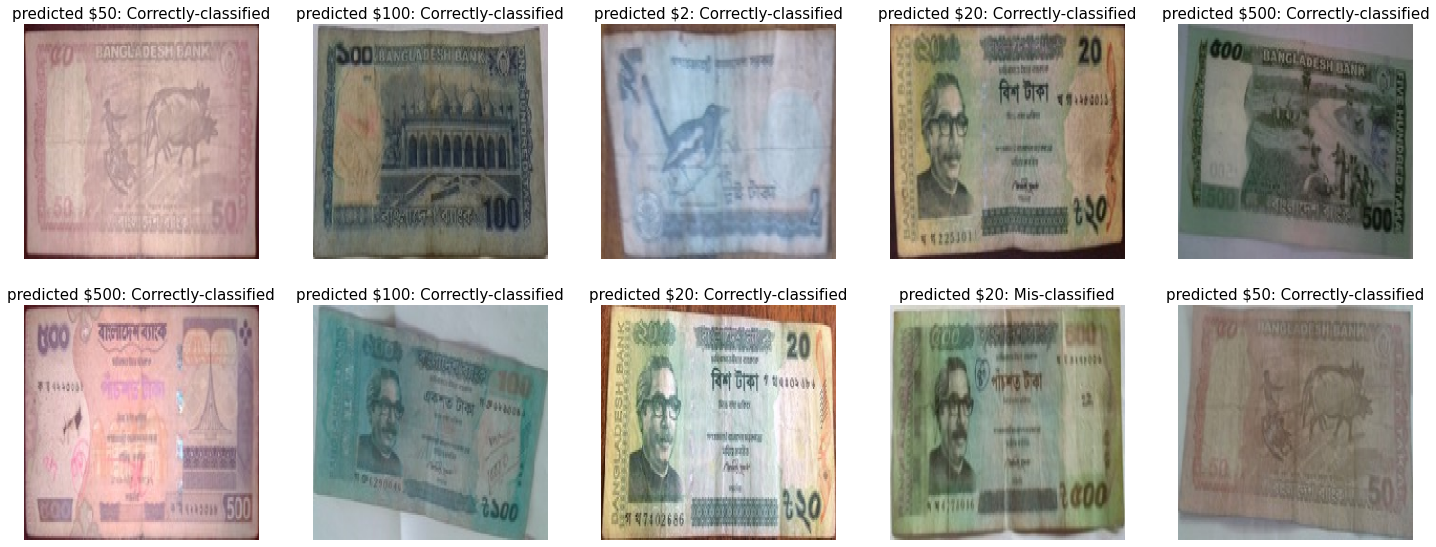

In [13]:
# Plot five random images and their predictions
random.seed(0)
numbers = [random.randint(0, 332) for i in range(0, 10)]
actual_data = test_generator.classes

n = 0

for num in numbers:
   
    for key, value in test_generator.class_indices.items():
        if value == prediction_own[num]:
            key_value = key
    
    n += 1

    image = test_generator[num // 5][0][num % 5].astype(np.uint8)
    

    if prediction_own[num] == actual_data[num] :
        plt.figure(1, figsize=(25, 25))
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.title(f'predicted ${format(key_value)}: Correctly-classified', fontsize=15)
        plt.imshow(image)
        
    else:
        plt.figure(1, figsize=(25, 25))
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.title(f'predicted ${format(key_value)}: Mis-classified', fontsize=15)
        plt.imshow(image)


plt.show()
    

In [14]:
pred_resnet50 = model_resnet50.predict(test_generator, verbose=0)

# prediction = np.asarray(pred)
prediction_resnet50 = np.argmax(pred_resnet50,axis=1)
print(prediction_resnet50)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 3 2 2 2 0 2 2 2 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 3 5 5 3 3 3 7 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 2 3 3 4 3 4 3 3 3 3 3 3 3 7 8 4 4 4 4 7 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 5 5 7 5 7 7 5 7 5 5 5 5 5 5 5
 5 5 7 5 5 5 6 5 5 5 5 5 5 7 5 5 5 5 7 7 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


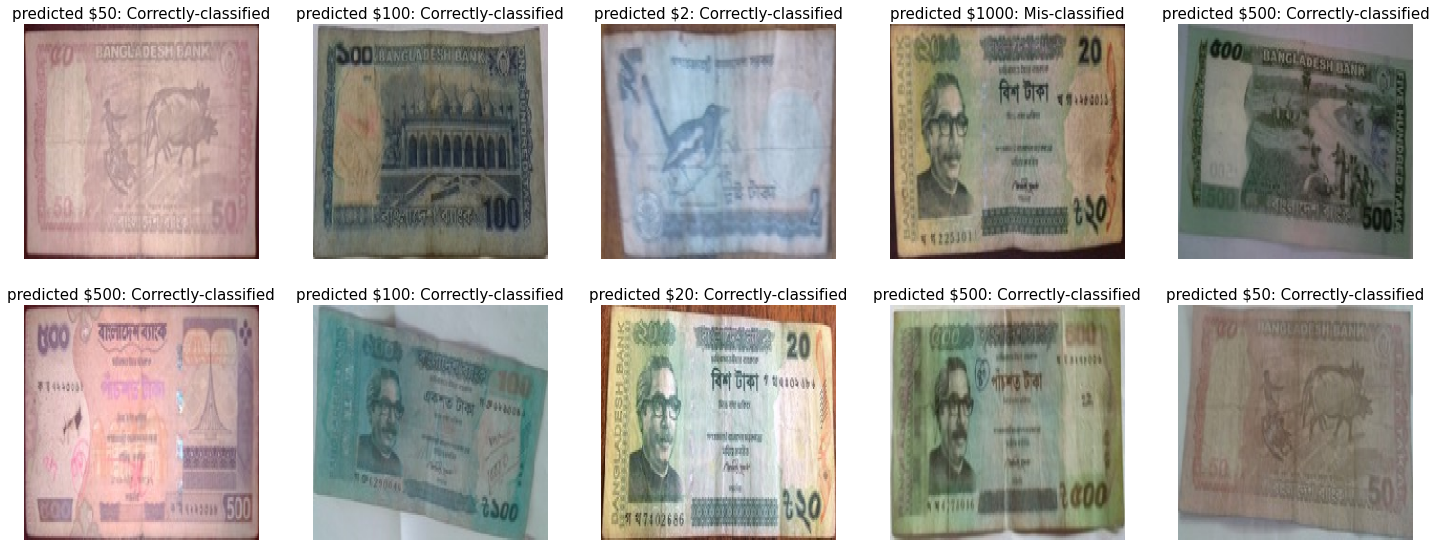

In [15]:
# Plot five random images and their predictions
random.seed(0)
numbers = [random.randint(0, 332) for i in range(0, 10)]
actual_data = test_generator.classes

n = 0

for num in numbers:
   
    for key, value in test_generator.class_indices.items():
        if value == prediction_resnet50[num]:
            key_value = key
    
    n += 1

    image = test_generator[num // 5][0][num % 5].astype(np.uint8)
    

    if prediction_resnet50[num] == actual_data[num] :
        plt.figure(1, figsize=(25, 25))
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.title(f'predicted ${format(key_value)}: Correctly-classified', fontsize=15)
        plt.imshow(image)
        
    else:
        plt.figure(1, figsize=(25, 25))
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.title(f'predicted ${format(key_value)}: Mis-classified', fontsize=15)
        plt.imshow(image)


plt.show()
    

In [16]:
pred_vgg = model_vgg.predict(test_generator, verbose=0)

# prediction = np.asarray(pred)
prediction_vgg = np.argmax(pred_vgg,axis=1)
print(prediction_vgg)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 5 0 0 5 2 1 1 1 0 1 1 0 5 1 1 5 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 5 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 0 4 3 3 3 5 3 3 3 3 3 3 0
 3 3 3 3 3 4 3 6 3 5 4 3 4 5 3 3 1 3 3 3 7 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 4 7 7 8 7 7 7 7 7 7 8 7 8 7 7 7
 8 7 7 7 5 7 7 8 7 7 7 7 6 7 7 7 7 7 8 7 5 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8
 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8]


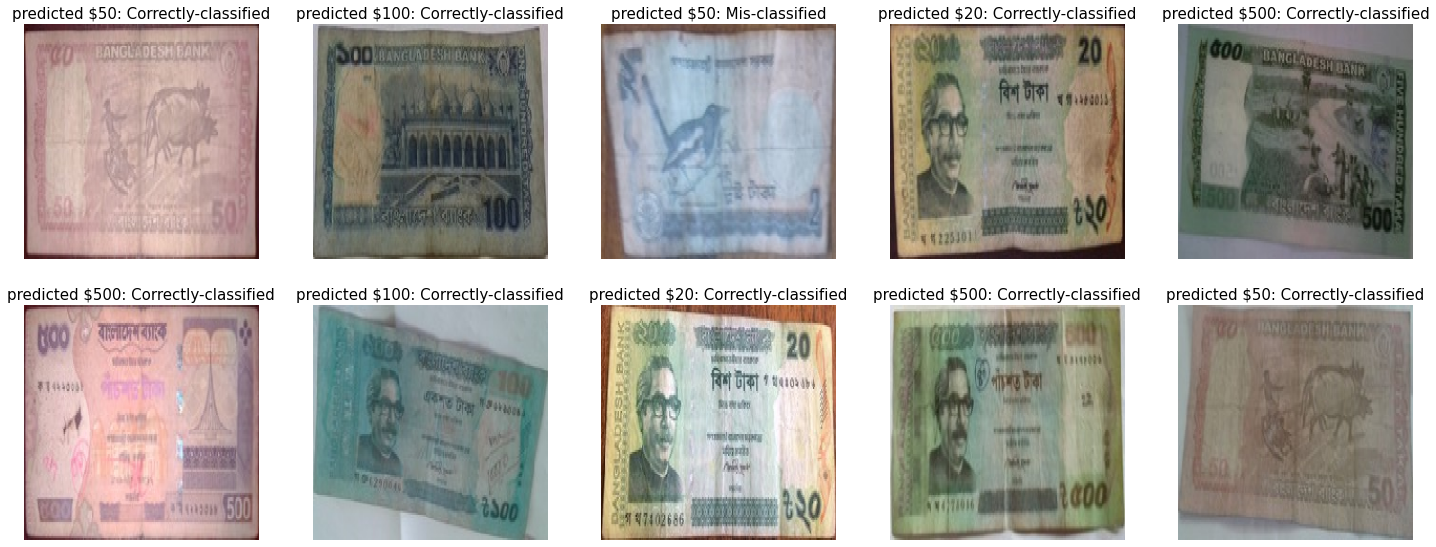

In [17]:
# Plot five random images and their predictions
random.seed(0)
numbers = [random.randint(0, 332) for i in range(0, 10)]
actual_data = test_generator.classes

n = 0

for num in numbers:
   
    for key, value in test_generator.class_indices.items():
        if value == prediction_vgg[num]:
            key_value = key
    
    n += 1

    image = test_generator[num // 5][0][num % 5].astype(np.uint8)
    

    if prediction_vgg[num] == actual_data[num] :
        plt.figure(1, figsize=(25, 25))
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.title(f'predicted ${format(key_value)}: Correctly-classified', fontsize=15)
        plt.imshow(image)
        
    else:
        plt.figure(1, figsize=(25, 25))
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.title(f'predicted ${format(key_value)}: Mis-classified', fontsize=15)
        plt.imshow(image)


plt.show()
    